In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (11, 4)
plt.rcParams["axes.grid"] = True

In [2]:
df = pd.read_csv("passengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.sort_values("Month").reset_index(drop=True).set_index("Month")
df.rename(columns={df.columns[0]: "value"}, inplace=True)


df2 = pd.read_csv("passengers2_filled_smoothed.csv")
df2["Month"] = pd.to_datetime(df2["Month"])
df2 = df2.sort_values("Month").reset_index(drop=True).set_index("Month")
df2["target_filled"] = df2["target_interp_pd"]

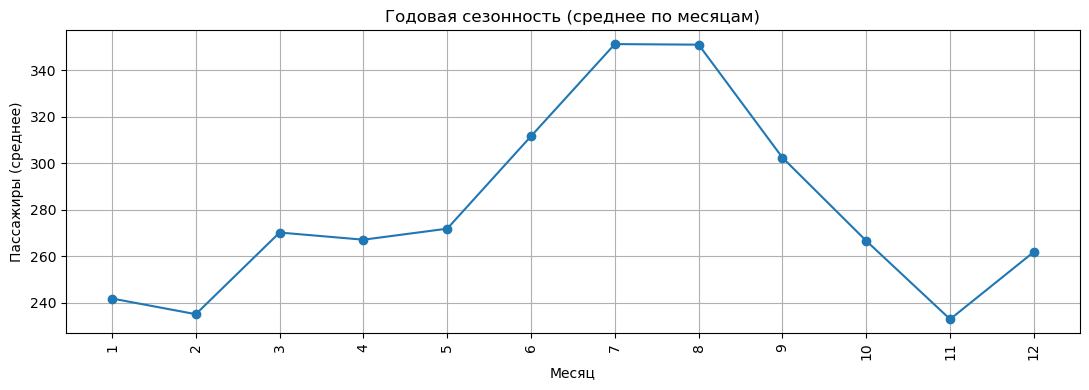

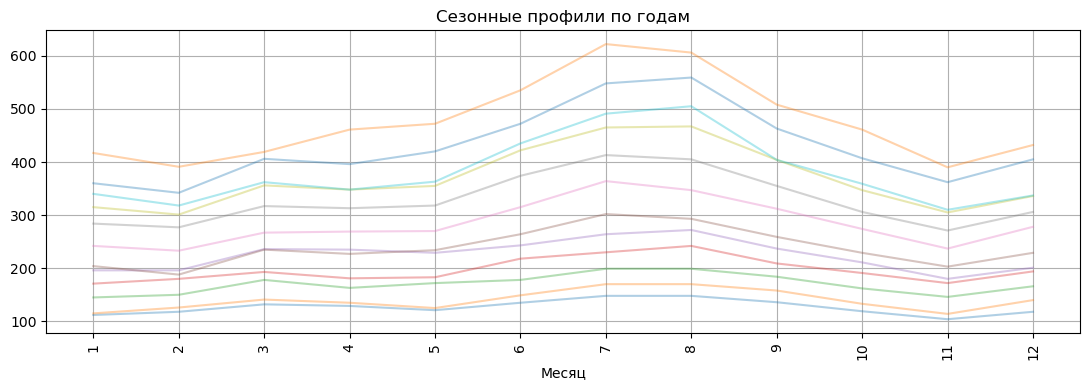

Комментарий: обычно пик летом (6–8 мес.), минимум зимой (1–2 мес.).


In [3]:
season = df["value"].groupby(df.index.month).mean()
ax = season.plot(marker="o", title="Годовая сезонность (среднее по месяцам)")
ax.set_xlabel("Месяц"); ax.set_ylabel("Пассажиры (среднее)")
plt.xticks(range(1,13), range(1,13), rotation=90, ha="center")
plt.tight_layout(); plt.show()

pivot = df.assign(year=df.index.year, month=df.index.month).pivot_table(
    index="month", columns="year", values="value"
)
pivot.plot(legend=False, alpha=0.35, title="Сезонные профили по годам")
plt.xlabel("Месяц"); plt.xticks(range(1,13), range(1,13), rotation=90, ha="center")
plt.tight_layout(); plt.show()

print("Комментарий: обычно пик летом (6–8 мес.), минимум зимой (1–2 мес.).")

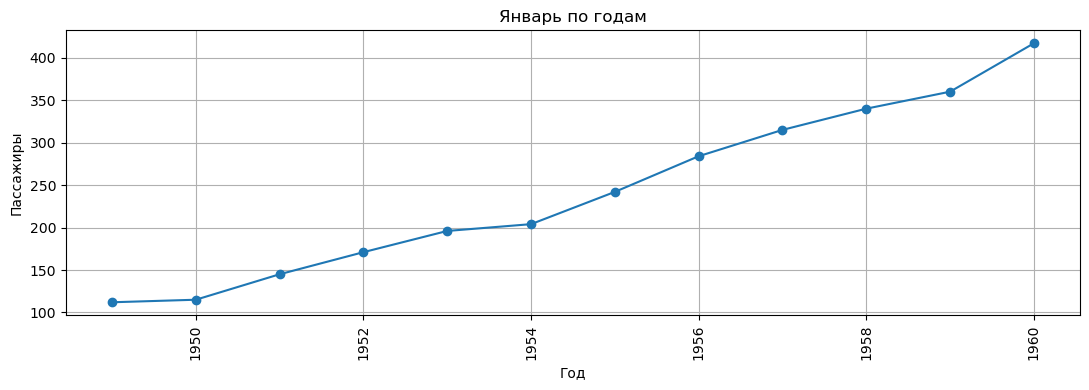

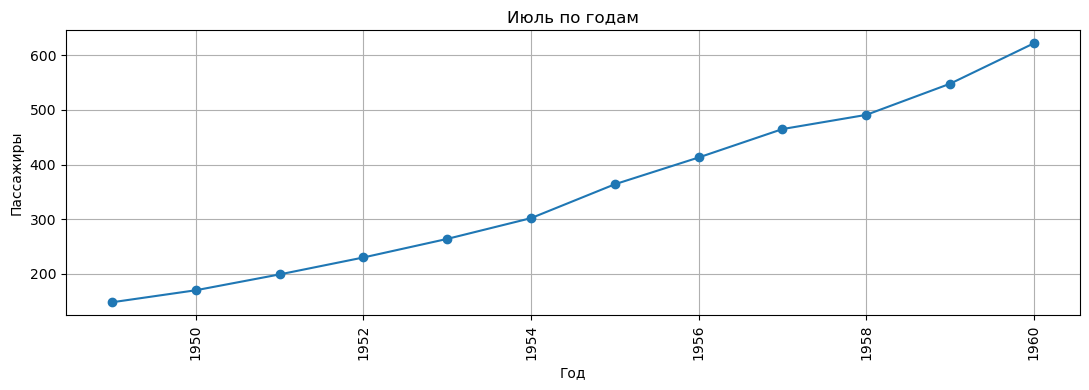

обычно июль растёт быстрее, т.к. сезонный пик.


In [4]:
m = df["value"].to_frame()
m["year"] = m.index.year
m["month"] = m.index.month

jan = m[m["month"]==1].set_index("year")["value"]
jul = m[m["month"]==7].set_index("year")["value"]

ax = jan.plot(marker="o", title="Январь по годам")
ax.set_xlabel("Год"); ax.set_ylabel("Пассажиры")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

ax = jul.plot(marker="o", title="Июль по годам")
ax.set_xlabel("Год"); ax.set_ylabel("Пассажиры")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

print("обычно июль растёт быстрее, т.к. сезонный пик.")

,mean,var
year,,
1949,126.666667,188.242424
1950,139.666667,363.696970
1951,170.166667,339.969697
1952,197.000000,527.454545
1953,225.000000,810.363636


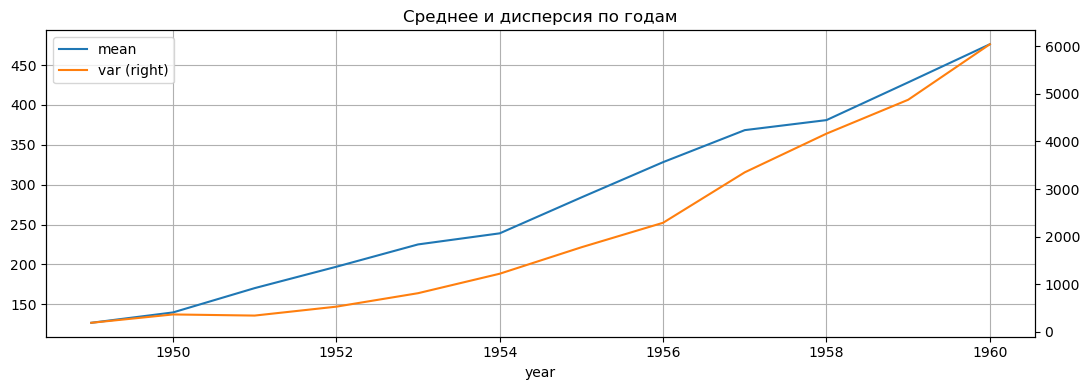

In [5]:
yearly_stats = m.groupby("year")["value"].agg(mean="mean", var="var")
display(yearly_stats.head())

ax = yearly_stats[["mean","var"]].plot(secondary_y="var", title="Среднее и дисперсия по годам")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

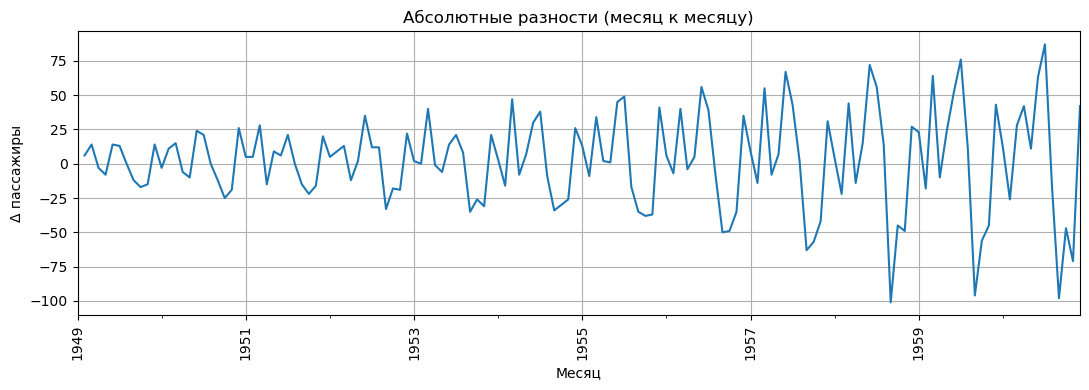

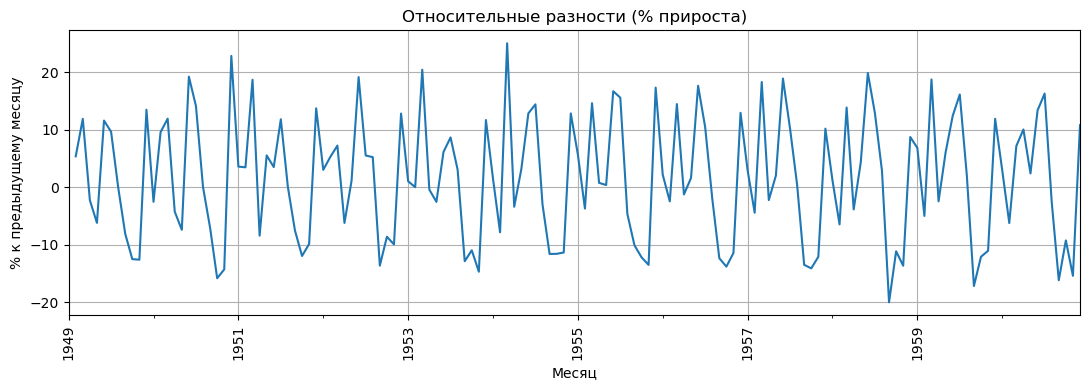

пики прироста чаще приходятся на весну/начало лета, провалы — на осень/зиму.


In [6]:
diff_abs = df["value"].diff()
diff_pct = df["value"].pct_change()*100

ax = diff_abs.plot(title="Абсолютные разности (месяц к месяцу)")
ax.set_xlabel("Месяц"); ax.set_ylabel("Δ пассажиры")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

ax = diff_pct.plot(title="Относительные разности (% прироста)")
ax.set_xlabel("Месяц"); ax.set_ylabel("% к предыдущему месяцу")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

print("пики прироста чаще приходятся на весну/начало лета, провалы — на осень/зиму.")

C:\Users\shoma\AppData\Local\Temp\ipykernel_7396\3381270421.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sum = df["value"].resample("Y").sum()
C:\Users\shoma\AppData\Local\Temp\ipykernel_7396\3381270421.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_sum = df["value"].resample("Q").sum()


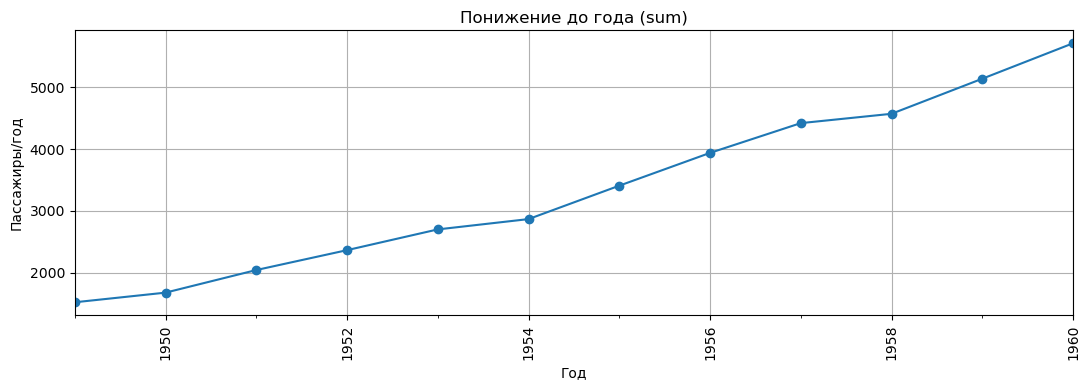

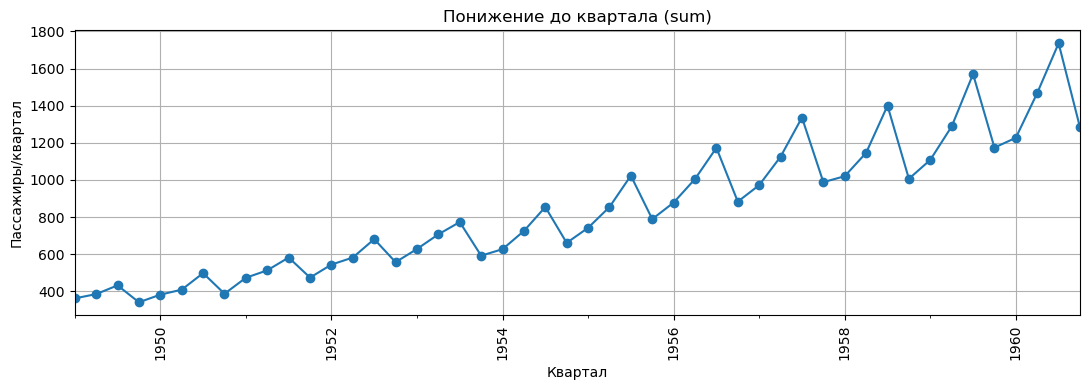

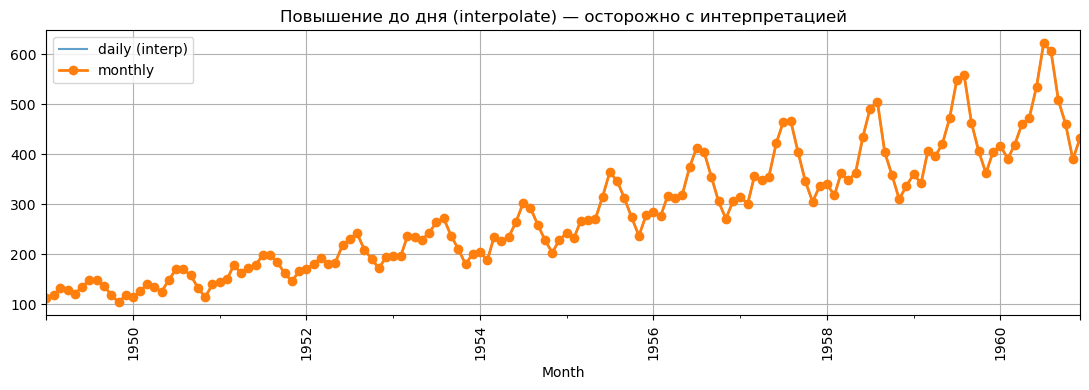

апсемплинг создаёт искусственные точки, надо аккуратно использовать


In [7]:
yearly_sum = df["value"].resample("Y").sum()
quarter_sum = df["value"].resample("Q").sum()

ax = yearly_sum.plot(marker="o", title="Понижение до года (sum)")
ax.set_xlabel("Год"); ax.set_ylabel("Пассажиры/год")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

ax = quarter_sum.plot(marker="o", title="Понижение до квартала (sum)")
ax.set_xlabel("Квартал"); ax.set_ylabel("Пассажиры/квартал")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

daily = df["value"].resample("D").interpolate("linear")
weekly = df["value"].resample("W").interpolate("linear")

ax = daily.plot(alpha=0.7, title="Повышение до дня (interpolate) — осторожно с интерпретацией")
df["value"].plot(ax=ax, style="o-", linewidth=2)
plt.legend(["daily (interp)", "monthly"])
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

print("апсемплинг создаёт искусственные точки, надо аккуратно использовать")

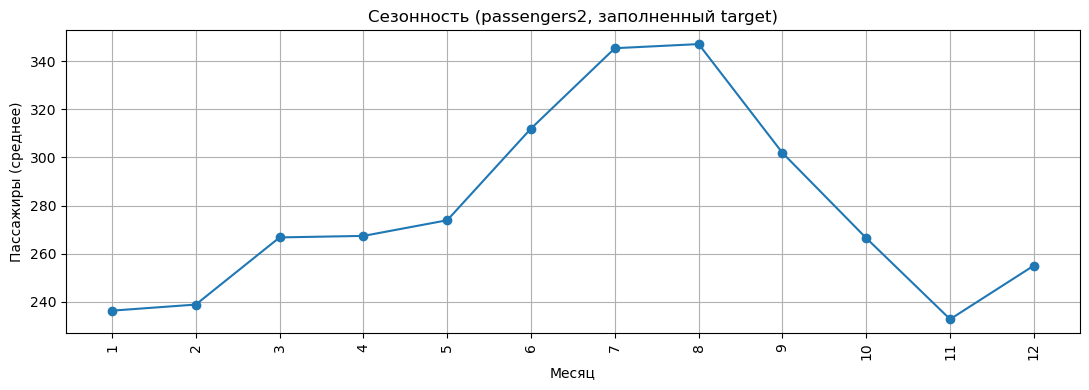

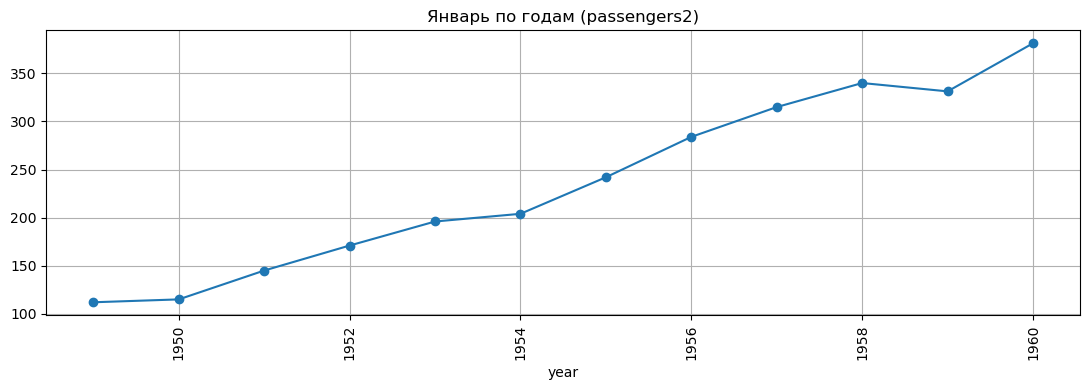

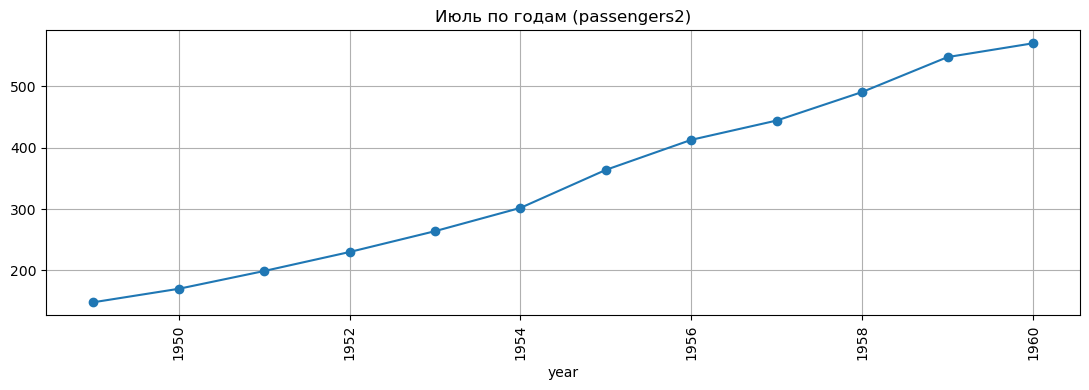

,mean,var
year,,
1949,126.041667,166.020833
1950,138.416667,348.946970
1951,167.625000,354.823864
1952,198.375000,508.142045
1953,225.708333,615.384470


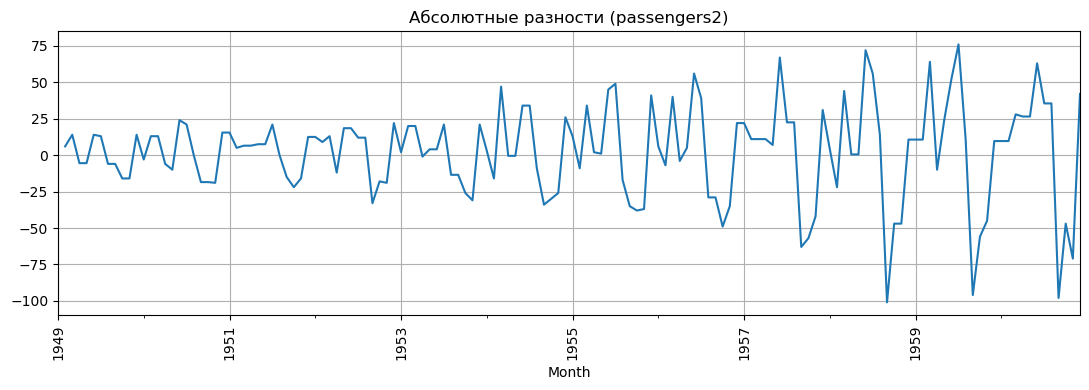

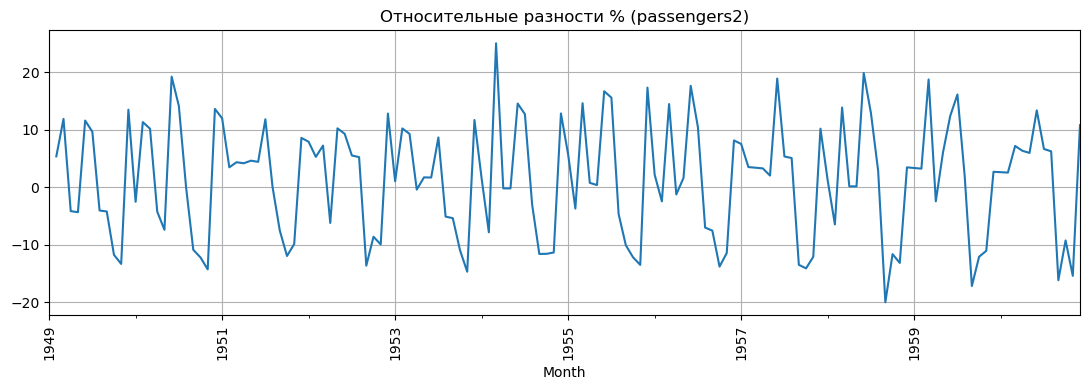

C:\Users\shoma\AppData\Local\Temp\ipykernel_7396\3304480539.py:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sum2 = s2.resample("Y").sum()
C:\Users\shoma\AppData\Local\Temp\ipykernel_7396\3304480539.py:33: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_sum2 = s2.resample("Q").sum()


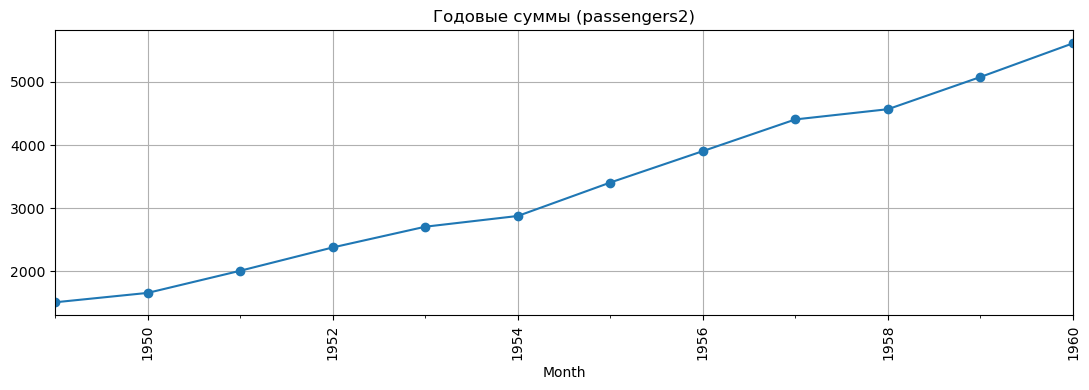

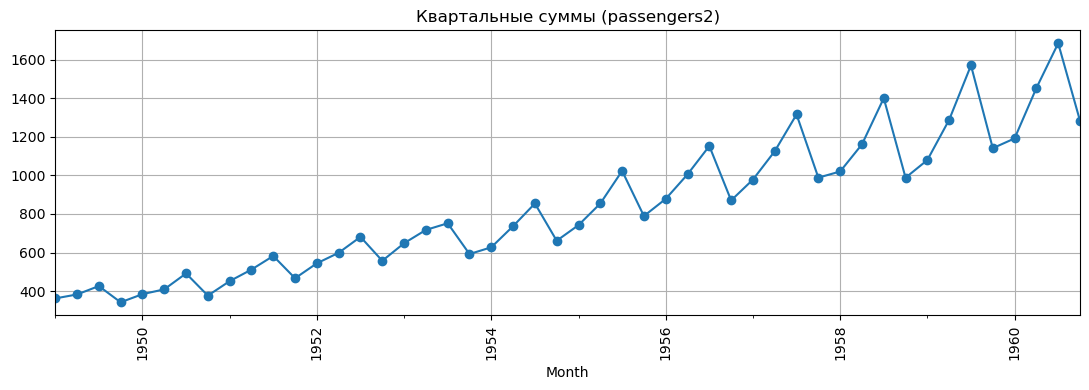

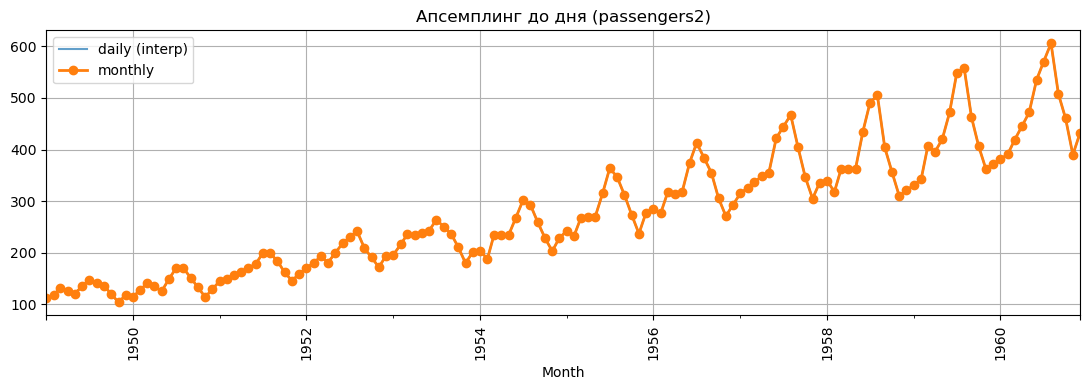

In [8]:
s2 = df2["target_filled"]

season2 = s2.groupby(s2.index.month).mean()
ax = season2.plot(marker="o", title="Сезонность (passengers2, заполненный target)")
ax.set_xlabel("Месяц"); ax.set_ylabel("Пассажиры (среднее)")
plt.xticks(range(1,13), range(1,13), rotation=90, ha="center")
plt.tight_layout(); plt.show()

tmp2 = s2.to_frame("value")
tmp2["year"] = tmp2.index.year; tmp2["month"] = tmp2.index.month
jan2 = tmp2[tmp2["month"]==1].set_index("year")["value"]
jul2 = tmp2[tmp2["month"]==7].set_index("year")["value"]

jan2.plot(marker="o", title="Январь по годам (passengers2)")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

jul2.plot(marker="o", title="Июль по годам (passengers2)")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

yearly_stats2 = tmp2.groupby("year")["value"].agg(mean="mean", var="var")
display(yearly_stats2.head())

diff_abs2 = s2.diff()
diff_pct2 = s2.pct_change()*100

diff_abs2.plot(title="Абсолютные разности (passengers2)")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

diff_pct2.plot(title="Относительные разности % (passengers2)")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

yearly_sum2 = s2.resample("Y").sum()
quarter_sum2 = s2.resample("Q").sum()

yearly_sum2.plot(marker="o", title="Годовые суммы (passengers2)")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

quarter_sum2.plot(marker="o", title="Квартальные суммы (passengers2)")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

daily2 = s2.resample("D").interpolate("linear")
weekly2 = s2.resample("W").interpolate("linear")

ax = daily2.plot(alpha=0.7, title="Апсемплинг до дня (passengers2)")
s2.plot(ax=ax, style="o-", linewidth=2)
plt.legend(["daily (interp)", "monthly"])
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

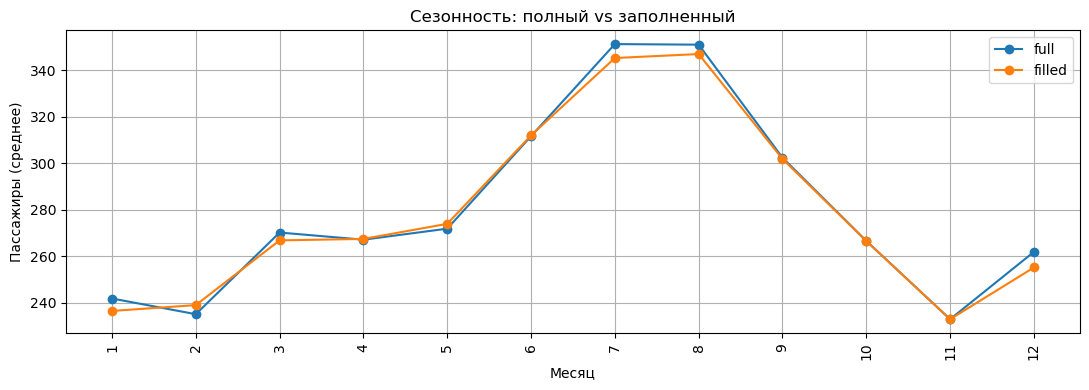

C:\Users\shoma\AppData\Local\Temp\ipykernel_7396\4172052196.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  {"full": df["value"].resample("Y").sum(), "filled": s2.resample("Y").sum()}, axis=1


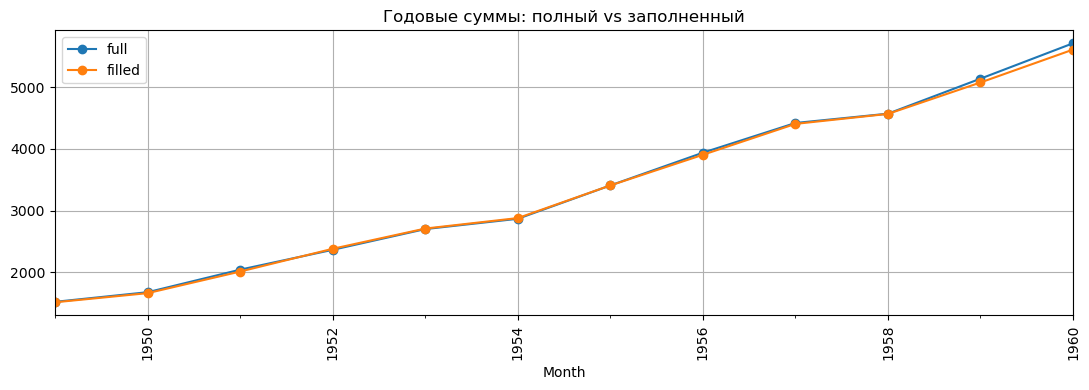

,full_mean,filled_mean,full_std,filled_std
0,280.298611,278.677083,119.966317,118.071015


In [9]:
cmp = pd.concat(
    {"full": season, "filled": season2}, axis=1
)
ax = cmp.plot(marker="o", title="Сезонность: полный vs заполненный")
ax.set_xlabel("Месяц"); ax.set_ylabel("Пассажиры (среднее)")
plt.xticks(range(1,13), range(1,13), rotation=90, ha="center")
plt.tight_layout(); plt.show()

cmp_year = pd.concat(
    {"full": df["value"].resample("Y").sum(), "filled": s2.resample("Y").sum()}, axis=1
)
cmp_year.plot(marker="o", title="Годовые суммы: полный vs заполненный")
plt.xticks(rotation=90, ha="center"); plt.tight_layout(); plt.show()

summary = pd.DataFrame({
    "full_mean": [df["value"].mean()],
    "filled_mean": [s2.mean()],
    "full_std": [df["value"].std()],
    "filled_std": [s2.std()],
})
display(summary)